In [18]:
from IPython import display

# What is class imbalance and why is it important

* Imbalanced data refers to datasets where the target has different proportions amongst it's class. In other words, one class is over-represented compared to the other(s).
* The class imbalance scenario exists for classification problems (binary or multi-class)
* It is important to ensure we are focusing and solving the right problem. If a dataset has 95% of one class = 0, and 5% of the other class = 1, we wouldn't be satisfied having a 95% accuracy just by classifying all records as 0.

# Before taking action, understand the problem to choose the right metric

### Summary of metrics

| Metric                 | Formula                                                           | Is is appropriate for imbalanced problems | Suggested use                                                                                                                                                                                                                                                                                                                                  |
|------------------------|-------------------------------------------------------------------|-------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| $Accuracy$             | $\frac{TP+TN}{TP+TN+FP+FN}$                                       | <ul><li>No</li></ul>                      | <ul><li>Understand baseline/naive classifier metric</li><li>Balanced classification problems</li><li>When both classes are equally important</li></ul>                                                                                                                                                                                         |
| $Precision$            | $\frac{TP}{TP+FP}$                                                | <ul><li>Depends</li></ul>                 | <ul><li>Measures **quality**</li><li>Optimise for precision if you want your model to make the least amount of possible errors</li></ul>                                                                                                                                                                                                       |
| $Specificity$          | $\frac{TN}{TN+FP}$                                                | <ul><li>Depends</li></ul>                 | <ul><li>Idem as precision but for the negative class</li></ul>                                                                                                                                                                                                                                                                                 |
| $Recall / Sensitivity$ | $\frac{TP}{TP+FN}$                                                | <ul><li>Depends</li></ul>                 | <ul><li>Measures **coverage**</li><li>Optimise for recall if you want to catch all possible instances of the target</li></ul>                                                                                                                                                                                                                  |
| $F1 Score$             | $2*\frac{precision*recall}{precision+recall}$                     | <ul><li>Yes</li></ul>                     | <ul><li>Combines quality and coverage measures</li><li>Optimise for F1-score when you believe that precision and recall should be equally weighted</li><li>Use this when you believe that the positive and negative class should be weighted differently (give more value to the positive class and forget about the negative class)</il></ul> |
| $F-beta Score$         | $(1+\beta^2)*\frac{precision*recall}{(\beta^2*precision)+recall}$ | <ul><li>Yes</li></ul>                     | <ul><li>Ideam to F1 score</li></ul>                                                                                                                                                                                                                                                                                                            |
| $MCC$                  | $\frac{(TP*TN)-(FP*FN)}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$     | <ul><li>Yes</li></ul>                     | <ul><li>Combines all 4 categories of the confusion metric (tp, fn, tn, fn)</li><li>Use this when both the positive and negative class are equally important</li></ul>                                                                                                                                                                          |
| $AUC-ROC$              | <ul><li>Area under the ROC curve</li></ul>                        | <ul><li>No</li></ul>                      | <ul><li>When you care equally about positive and negative classes metric</li><li>When you care about ranking predictions, not necessarily well-calibrated probabilities</li></ul>                                                                                                                                                              |
| $AUC-PRC$              | <ul><li>Area under the Precision-Recall curve</li></ul>           | <ul><li>Depends</li></ul>                 | <ul><li>The Precision-Recall curve is more sensitive when dealing with imbalanced problems.</li></ul>                                                                                                                                                                                                                                          |


### Understanding metrics
##### Confusion matrix
*Image source: https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html*


![title](img/confusionMatrxiUpdated.jpg)

##### Accuracy

* Accuracy how many observations, both positive and negative, were correctly classified.
* It is **NOT** a good metric to use for imbalanced problems, as it is easy to get a high accuracy score by simply classifying all observations as the majority class.
* It is useful to understand the effects of a naive classifier.

##### Precision and Recall

**Precision**
* Measures the quality of the positive class prediction made by the model.
* It answers the question: 'out of our predicted positive class, which ones are truly correct?'
* For example, on a cancer detection exercise, we would be answering: 'out of our 100 predicted patients, which ones do truly have cancer?'

**Recall**
* Measures the completeness (or coverage) of the positive class prediction made by the model.
* It answers the question: 'out of all possible true positives, how many has the model detected?'
* For example, on a cancer detection exercise, we would be answering: 'out of 500 patients with patients, how many have we flagged?'

**Precision and recall are, generally, inversely correlated.**
* When a model wants to be very precise with its predictions, it normally leaves out true positives out (ie, reducing recall)
* When a model wants to captured all possible true positives, it normally does it by including as a predicted true positive instances with lower probabilities (ie, reducing precision).

##### F1 and Fbeta scores
**F-scores**
* As you can see from the formula, F1 is a special case of the Fbeta score, but we have included both for completeness (this way you can decide if positive and negative classes should be treated equally).
* Fbeta is tricky in the sense that it includes another parameter to tune, ie, how much better should precision by over recall (how much better should quality be over coverage).

**There is a problem with F-scores**
* F-scores consider only 1 class, ie, it is interested **only in the positive class** and not the negative class.
* Now, one might argue that this is OK, as what we are trying to do is predict this minority positive class.
* However, leaving the majority class out of scope doesn't seem intelligent either. We want our model to do as best as possible in both classes, with maybe a bit more skew towards the minority class.

**What is the problem**
* Let's review the formula. If you look at the confusion matrix and the precision-recall formulas, the TN bucket doesn't appear at all in the formulas.
* This means that, we could have a 0 or infinity in the TN bucket, and F-scores wouldn't change at all.
* In other words, the positive and negative class are not symmetric.

**2 examples to illustrate this**
* Example 1: TP = 18, TN = 1, FP = 3, FN = 2
* Example 2: TP = 1, TN = 18, FP = 2, FN = 3 (inverse of example 1)
* F1 score example 1 = 88%
* F1 score example 2 = 29%
* So... just by labelling the majority class at positive or negative, we get wildly different F1-scores!

##### MCC: Matthews Correlation Coefficient

**Properties**
* Takes into account all buckets in the classification matrix
* It is a special case of Pearson Correlation Coefficient applied to a binary classification task (where 2 the random variables are prediction and label)
* Values between -1 and 1.
    * MCC = 0, the classifier is no better than a random flip (weak correlation).
    * MCC = 1, predictions match labels (strong positive correlation).
    * MCC = -1, predictions disagree with labels (strong negative correlation).
* Perfectly symmetric for both classes (positives are not more important than negatives)

**2 examples to illustrate this**
* Example 1: TP = 18, TN = 1, FP = 3, FN = 2
* Example 2: TP = 1, TN = 18, FP = 2, FN = 3 (inverse of example 1)
* F1 score example 1 = 0.17
* F1 score example 2 = 0.17
* As you can see, given MCC is symmetrical, MCC outputs the same value if you interchange the positive and negative class.
* In addition, we get a sense here that our model is slightly better than random.

# Method 1: changing the probability thresholds to define each class

### Understanding the ROC curve - Receiver Operating Characteristic curve

**What**
* It is a plot that summarizes the performance of a binary classification model on the **positive class.**
* x-axis => the False Positive Rate (FP / (FP + TN))
    * If specificity was the fraction of correct predictions of the *negative* class, FPR is the fraction of *errors* of the *negative* class.
* y-axis => the True Positive Rate (TP / (TP + FN)). In other words, Recall.

**Interpreting the plot**
* We can think of the plot as the fraction of correct predictions for the positive class (y-axis) versus the fraction of errors for the negative class (x-axis).
* Ideally, we would want a high recall (TPR), where the model is pulling as many true positives as possible; paired with a low FPR, where the model, out of the extracted positive classes, they are incorrect.
* The best scenario is when y-axis = 1, and x-axis = 0.
    * We are capturing all possible cancer cases, and making no errors in these predictions.
* The worst scenario is when y-axis = 0, and x-axis = 1.
    * We are not pulling any of the true cancer cases, and all our positive class predictions are incorrect.
* The random case scenario is when y-axis = x-axis.
    * We are only pulling 50% of the true cancer cases, and out of the positive class predictions, we are making 50% errors.
    * In the plot below, this is represented as a diagonal line.
    * This is the case we would, at least, like to beat. Anything below this line, is considered worst than random.

### Choosing an optimal probability threshold

**What do we mean by different threshold cut-off points?**
* The ROC curve enables us to plot a classifier with different threshold cut-off points.
* The default classification scenario is to assign a positive class when the predicted probability is 50% or more.
* However, we could move this threshold to play around with coverage (Recall) and quality (Precision)
      * For example, if we decreased the threshold to 0.25, we would be assigning many more records as a positive class, but we would also be making the quality of our predictions worse.
      * On the contrary, if we increased the threshold to 0.75, we would be predicting fewer records as being positive, but we would also be increasing the confidence in these predictions.

**What is the best way to change the probability threshold?**
* It depends. You should choose the most suitable threshold for the business case.
* The general rule is to maximise the difference between TRP-FPR.
    * In the chart below, TPR-FPR is represented as the vertical green, orange and blue lines over the dotted line.
    * In this case, the orange line is the 'longest' of the 3 displayed (but would choose the 'longest' over all possible thresholds)
* You could also take the approach which, for each probability threshold, you calculate the F-score and choose the one that maximizes it.

*Image source: https://towardsdatascience.com/deep-dive-into-roc-auc-cfdd78959ac3*

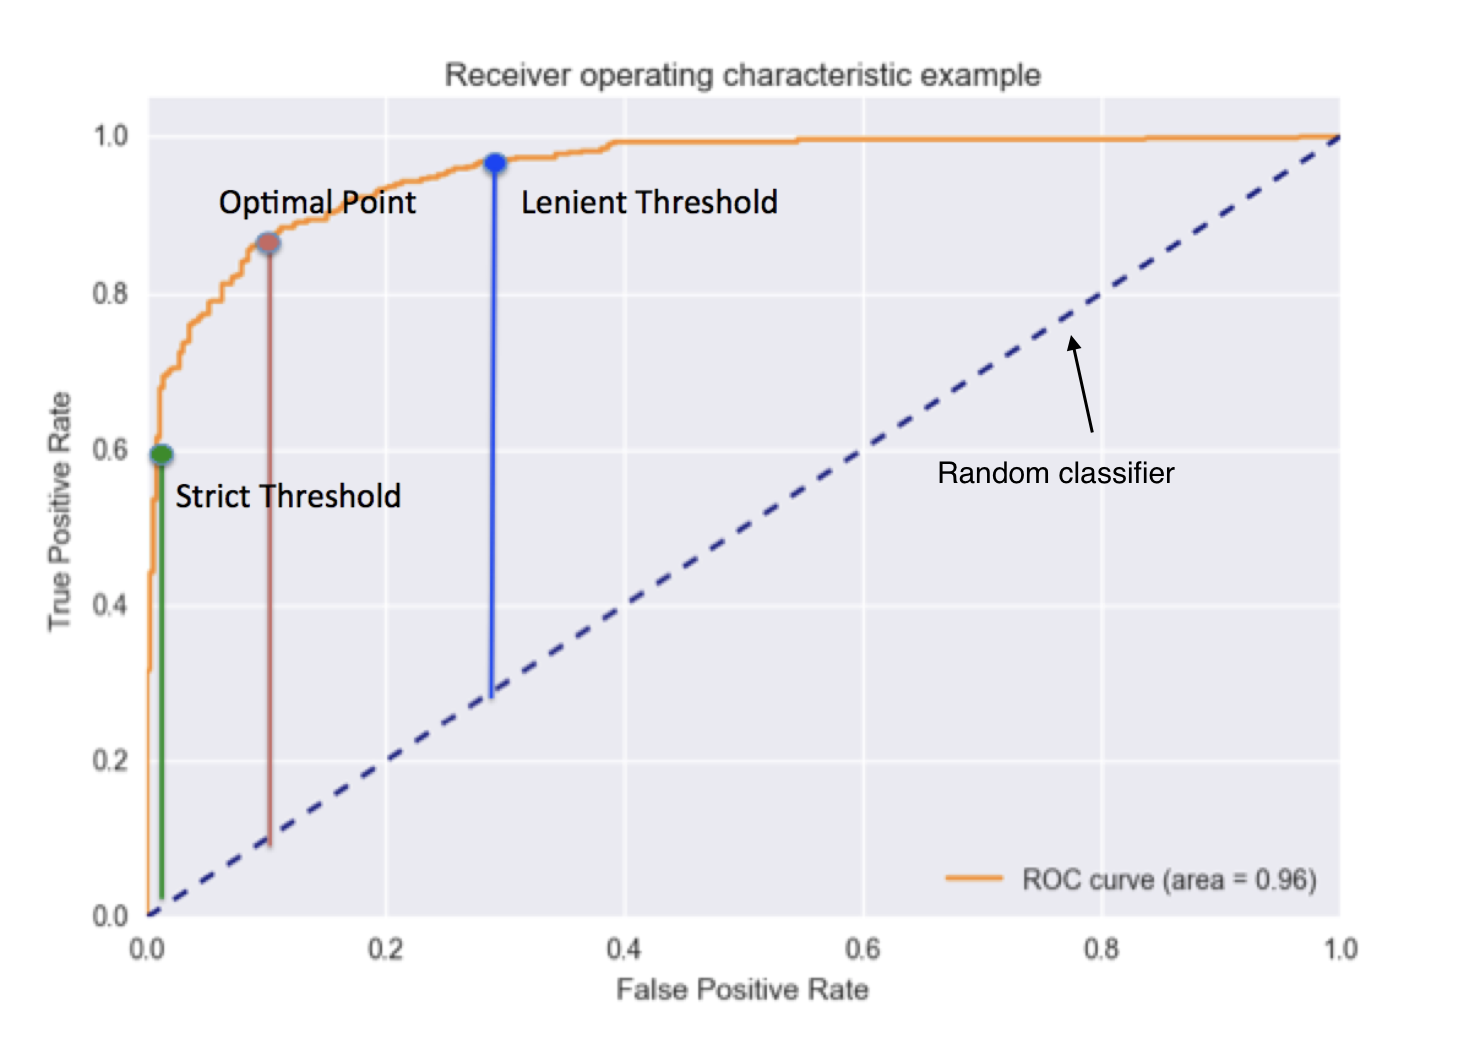

In [27]:
display.Image(filename='img/roc-curve.png')

### AUC ROC score

**Why AUC score?**
* Whilst the ROC Curve is a helpful diagnostic tool, it can be difficult to compare two or more classifiers based on their curves.
    * The easy case is when ROC curve for model 1 is always above ROC curve for model 2.
    * But what if, in certain areas its below and other above? Not as easy to compare them.
* AUC (or area under the curve), can be calculated to give a single score for a classifier model across **all threshold values.**

**Interpretation of AUC score**
* ROC-AUC is a value between 0 and 1
    * 1 => perfect classifier => ROC curve would be a square with points (0, 1) to (1, 1).
* It can be interpreted as the probability that the scores given by a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

**Why is AUC a problem for imbalanced problems?**
* The Receiver Operating Characteristic (ROC) curves plot FPR vs. TPR.
* Because TPR only depends on positives, ROC curves **do not measure the effects of negatives**.
* In terms of AUC, it assesses *overall* classification performance.
* This means that AUC does not place more emphasis on one class over the other, so it does not reflect the minority class well.
* You can think of AUC as a cousin of Accuracy, and as we know, accuracy is not a good metric for imbalanced datasets.

### Understanding the PR curve - Precision-Recall curve

**What**
* A precision-recall curve (or PR Curve) is a plot of the precision (y-axis) and the recall (x-axis) for different probability thresholds.
* Compared to AUC (which considers both the positive and negative class - which we know causes problems for imbalanced datasets), the PR curve focuses **only on the positive class**.
* Just by focusing on the positive class, the PR curve will be more sensitive to changes on imbalanced datasets.

**Interpreting the plot**
* Ideally, we would want a high precision, where the quality of the positive class predictions is high; paired with a high recall, where the model is pulling all possible true positive cases.
* The best scenario is when y-axis = 1, and x-axis = 1.
    * We are capturing all possible cancer cases, and making all positive class predictions are correct.
* The random case scenario is when y-axis = 0.5.
    * In the plot below, this is represented as a diagonal line.
    * In other words, 50% of the predicted positive class are correct.

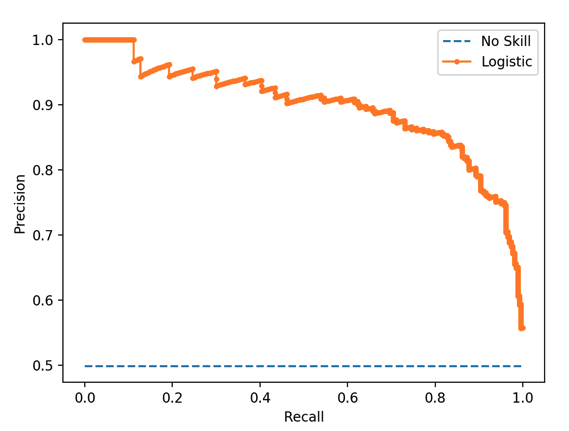

In [29]:
display.Image(filename='img/precision-recall-curve.png')

### AUC Precision-Recall score

* Idem to AUC-ROC score, but using the preicision-recall curve

# Method 2: Stratified train-test split

# Method 3: under or over sampling

# Method 4: target class weights

Notes:
* Logistic, Random Forest, XGB, LightGBM, CatBoost
* Summary section of models robust to class imbalance

# Method 5: cost sensitive learning